---------------

<font size='5' face='Courier New'><h1 align="center"><i>Optimizer Performance Comparison in Python v2.7: Set Cover Location Problem</i></h1></font> 

------

---

<font size='4' face='Arial'><h1 align="center"><i>Gurobi Optimizer v6.0.2</i></h1></font>
<font size='4' face='Arial'><h1 align="center"><i>vs.</i></h1></font>
<font size='4' face='Arial'><h1 align="center"><i>IBM ILOG CPLEX Optimizer v12.6.0</i></h1></font>

----

---

<font size='4' face='Arial'><h1 align="center"><i>PySAL v1.10.0</i></h1></font>

-------

<font face='Times New Roman' size='6'><h3 align="center"><u>*James&nbsp;D.&nbsp;Gaboardi*</u></h3></font>

------
<font face='Times New Roman' size='5'><h3 align="center">*Florida State University* &nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp; *Department of Geography*</h3></font>

------

<font size='3' face='Times New Roman'><p><b>GNU LESSER GENERAL PUBLIC LICENSE</b></p>
<p><i>Version 3, 29 June 2007</i></p>
<p> Copyright (C) 2007 Free Software Foundation, Inc. <http://fsf.org/></p>
<p> Everyone is permitted to copy and distribute verbatim copies
 of this license document, but changing it is not allowed.</p></font>
 
 ----

<font size='7' face='Times New Roman'><b><u>The Set Cover Location Problem</u></b></font>

<p><font size='5' face='Courier New'><u>Minimize</u></font></p>

<p><font size='6' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\sum_{j=1}^n$<i>&thinsp; d<sub>j</sub>x<sub>j</sub></i></font></p>

<p><font size='5' face='Courier New'><u>Subject to</u></font></p>

<p><font size='6' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$∑_{j=1}^n$<i>a<sub>ij</sub>x<sub>j</sub></i> ≥ 1,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <i> i</i> = 1 ∊<i> n</i></font></p>


<p><font size='6' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i>x<sub>j</sub></i> ∊(0,1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    <i> j</i> = 1 ∊ <i> m</i></font></p>
<p><font size='5' face='Courier New'><u>where</u></font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> i</i> = a specific origin</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> j</i> = a specific destination</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> n</i> = the set of origins</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> m</i> = the set of destinations</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> x<sub>i</sub></i> = the decision variable at each node in the matrix</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> a<sub>ij</sub></i> = binary matrix describing the coverage of each node</font></p>
<p><font size='5' face='Courier New'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <u>where</u></font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;− <i> a<sub>ij</sub></i> = 1 ∀ <i> i</i>, <i> j</i> ∋ <i> d<sub>ij</sub></i> ≥ S (S is user defined) </font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;− <i> a<sub>ij</sub></i> = 0 otherwise</font></p>
<p><font size='5' face='Times New Roman'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	<i> d<sub>ij</sub></i> = distance from ith origin to jth destination</font></p>

------

<p><font size='4' face='Times New Roman'>Adapted from:</font></p>
<p><font size='4' face='Times New Roman'><b>Daskin, M. S.</b> 1995. <i>Network and Discrete Location: Models, Algorithms, and Applications</i>. Hoboken, NJ, USA: John Wiley & Sons, Inc.</font></p>

-----------

<font size='7' face='Times New Roman'><b>0. <u>Imports</u></b></font>

In [1]:
import pysal as ps
import numpy as np
import networkx as nx
import shapefile as shp
import gurobipy as gbp
import cplex as cp
import datetime as dt
import time
from collections import OrderedDict
import IPython.display as IPd
%pylab inline
from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


<font size='7' face='Times New Roman'><b>1. <u>Data preparation and creation</u></b></font>

<font size='5' face='Times New Roman'><b>1.1 <u>Instantiate a network</u></b></font>

In [2]:
ntw = ps.Network('Waverly/Waverly.shp')
print dt.datetime.now()
print 'PySAL.Network\n'
print dir(ntw)

2015-08-19 11:50:56.354964
PySAL.Network

['NetworkF', 'NetworkG', 'NetworkK', '__doc__', '__init__', '__module__', '_extractnetwork', '_newpoint_coords', '_round_sig', '_snap_to_edge', '_yieldneighbor', 'adjacencylist', 'allneighbordistances', 'compute_distance_to_nodes', 'contiguityweights', 'count_per_edge', 'distancebandweights', 'edge_lengths', 'edge_to_graph', 'edges', 'enum_links_node', 'extractgraph', 'graph_lengths', 'graph_to_edges', 'graphedges', 'in_shp', 'loadnetwork', 'nearestneighbordistances', 'node_coords', 'node_distance_matrix', 'node_list', 'node_sig', 'nodes', 'pointpatterns', 'savenetwork', 'segment_edges', 'simulate_observations', 'snapobservations', 'unique_segs']


<font size='5' face='Times New Roman'><b>1.2 <u>Instantiate all graphs to be drawn</u></b></font>

In [3]:
# Roads and Nodes
g = nx.Graph()
# Graph of Roads and Nodes
g1 = nx.MultiGraph()
# Clients
GRAPH_client = nx.Graph()
# Snapped Clients
g_client = nx.Graph()
# Service
GRAPH_service = nx.Graph()
# Snapped Service
g_service = nx.Graph()
# Gurobi p-Median
GUROBI_setcover_g = nx.Graph()
# Cplex p-Median
CPLEX_setcover_g = nx.Graph()

<font size='5' face='Times New Roman'><b>1.3 <u>Create Bounding Box from 'Waverly.shp'</u></b></font>

In [4]:
shp_W = ps.open('Waverly/Waverly.shp')
shp_W.bbox

[-84.280694, 30.450132999999997, -84.24955399999999, 30.507330999999997]

<font size='5' face='Times New Roman'><b>1.4 <u>Create numpy arrays of random floats within a  bounding box</u></b></font>

In [5]:
lat_client = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 5)
lon_client = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 5)
lat_service = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 5)
lon_service = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 5)

<font size='5' face='Times New Roman'><b>1.5 <u>Zip the latitude and longitude lists together</u></b></font>

In [6]:
rand_coords_client = map(list, zip(lat_client, lon_client))
rand_coords_service = map(list, zip(lat_service, lon_service))

<font size='5' face='Times New Roman'><b>1.6 <u>Create Empty Random Points Dictionaries</u></b></font>

In [7]:
points_client = {}
points_service = {}

<font size='5' face='Times New Roman'><b>1.7 <u>Fill dictionaries of random roints</u></b></font>

In [8]:
# CLIENT
for idx, coords in enumerate(rand_coords_client):
    GRAPH_client.add_node(idx)
    points_client[idx] = coords
    GRAPH_client.node[idx] = coords
# SERVICE   
for idx, coords in enumerate(rand_coords_service):
    GRAPH_service.add_node(idx)
    points_service[idx] = coords
    GRAPH_service.node[idx] = coords

<font size='5' face='Times New Roman'><b>1.8 <u>Draw network, simplified network, and random client & service nodes</u></b></font>

2015-08-19 11:51:01.139977


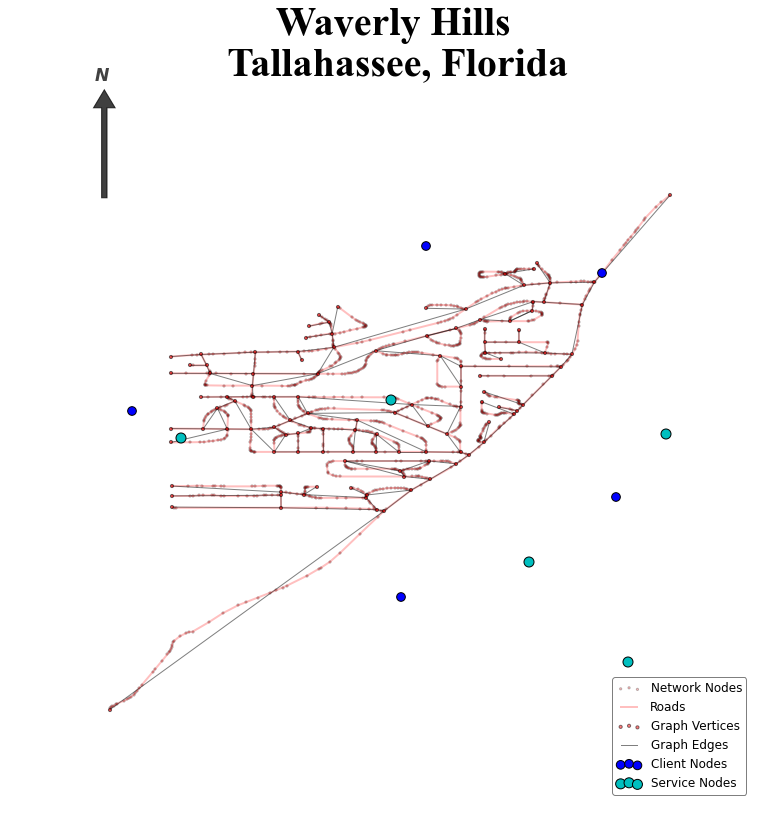

In [9]:
print dt.datetime.now()
#Instantiate Figure
figsize(10,10)
# Draw Graph of Actual Nodes and Roads
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)
# Draw only unique edges in graph
for e in ntw.graphedges:
    g1.add_edge(*e)
    # highlights cases where start and end node are the same
    if e[0]==e[1]:
        g1.add_node(e[0])
for node_id in g1.node:
    g1.node[node_id] = ntw.node_coords[node_id]
nx.draw(g1, ntw.node_coords, node_size=10, alpha=0.5)
# Draw Graph of Random Client Points
nx.draw(GRAPH_client, points_client, 
    node_size=75, alpha=1, node_color='b')
# Draw Graph of Random Service Points
nx.draw(GRAPH_service, points_service, 
    node_size=100, alpha=1, node_color='c')
# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Graph Vertices']=g1
LEGEND['Graph Edges']=g1
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, loc='lower right', fancybox=True, framealpha=0.5)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')
# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.507, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.52), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

<font size='5' face='Times New Roman'><b>1.9 <u>Create S</u></b></font>

In [10]:
S = 2

<font size='5' face='Times New Roman'><b>1.10 <u>Instantiate client and service shapefiles</u></b></font>

In [11]:
# Client
client = shp.Writer(shp.POINT)
# Add Random Points
for i,j in rand_coords_client:
    client.point(i,j)
# Add Fields
client.field('client_ID')
#client.field('Weight')
client.field('LAT')
client.field('LON')
counter = 0
for i in range(len(rand_coords_client)):
    counter = counter + 1
    client.record('client_' + str(counter), lat_client[i], lon_client[i])
# Save Shapefile    
client.save('shapefiles/RandomPoints_CLIENT')

#Service
service = shp.Writer(shp.POINT)
# Add Random Points
for i,j in rand_coords_service:
    service.point(i,j)
# Add Fields
service.field('y_ID')
service.field('x_ID')
service.field('LAT')
service.field('LON')
counter = 0
for i in range(len(rand_coords_service)):
    counter = counter + 1
    service.record('y' + str(counter), 'x' + str(counter), lat_service[i], lon_service[i])
# Save Shapefile    
service.save('shapefiles/RandomPoints_SERVICE')

<font size='5' face='Times New Roman'><b>1.11 <u>Snap Observations to NTW</u></b></font>

In [12]:
t1 = time.time()
ntw.snapobservations('shapefiles/RandomPoints_CLIENT.shp', 
                     'Rand_Points_CLIENT', attribute=True)
ntw.snapobservations('shapefiles/RandomPoints_SERVICE.shp', 
                     'Rand_Points_SERVICE', attribute=True)
print round(time.time()-t1, 4), 'seconds'

1.1732 seconds


<font size='5' face='Times New Roman'><b>1.12 <u>Draw NTW, snapped coords, & random coords</u></b></font>

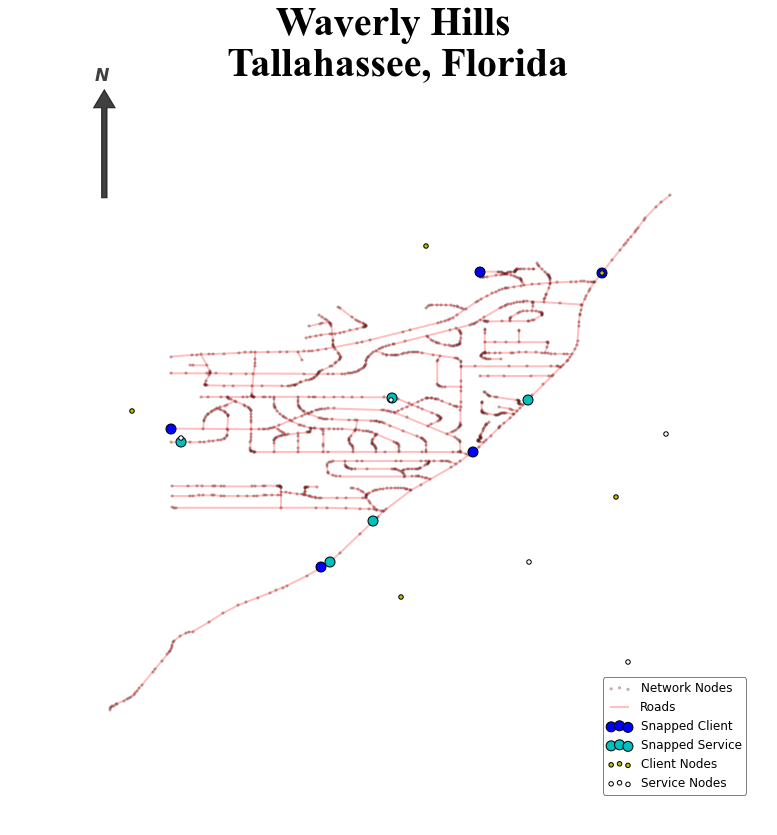

In [13]:
# Instantiate Figure
figsize(10,10)
# Draw Graph of Roads
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)
# Draw Graph of Snapped Client Nodes
g_client = nx.Graph()
for p,coords in ntw.pointpatterns['Rand_Points_CLIENT'].snapped_coordinates.iteritems():
    g_client.add_node(p)
    g_client.node[p] = coords
nx.draw(g_client, ntw.pointpatterns['Rand_Points_CLIENT'].snapped_coordinates, 
        node_size=100, alpha=1, node_color='b')
# Draw Graph of Snapped Service Nodes
g_service = nx.Graph()
for p,coords in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    g_service.add_node(p)
    g_service.node[p] = coords
nx.draw(g_service, ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates, 
        node_size=100, alpha=1, node_color='c')
# Draw Graph of Random Client Points
nx.draw(GRAPH_client, points_client, 
    node_size=20, alpha=1, node_color='y')
# Draw Graph of Random Client Points
nx.draw(GRAPH_service, points_service, 
    node_size=20, alpha=1, node_color='w')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Snapped Client']=g_client
LEGEND['Snapped Service']=g_service
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, loc='lower right', fancybox=True, framealpha=0.5)
# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')
# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.507, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.52), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

<font size='5' face='Times New Roman'><b>1.13 <u>Create distance matrix</u></b></font>

In [14]:
t1 = time.time()
All_Neigh_Dist = ntw.allneighbordistances(sourcepattern=ntw.pointpatterns['Rand_Points_CLIENT'],
                                             destpattern=ntw.pointpatterns['Rand_Points_SERVICE'])
All_Dist_MILES = All_Neigh_Dist * float(10000/90) * 0.6214
seconds = round(time.time()-t1, 4)
print seconds, 'seconds'
print 'Client [i] x Service [j] Matrix Shape --> ', All_Dist_MILES.shape

8.2683 seconds
Client [i] x Service [j] Matrix Shape -->  (5, 5)


----------------------

<font size='7' face='Times New Roman'><b>2. <u>Mathematical Optimization</u></b></font>

<font size='5' face='Times New Roman'><b>2.1a  <u>Gurobi Set Cover test [<i>S</i> = 1.25 miles]</u></b></font>

In [15]:
t1 = time.time()

#     1. Read In Data
# Cost Vector
Cij = All_Dist_MILES
# Create Aij: Determine Aij (nodes within S)
# S --> 1 = served; 0 = unserved
Aij = []
for i in np.nditer(Cij):
    if i <= S:
        outtext = 1
    else:
        outtext = 0
    Aij.append(outtext)
rows, cols = Cij.shape
Aij = np.array(Aij)
Aij = Aij.reshape(len(Cij),len(Cij[0]))
client_nodes = range(len(Cij))
service_nodes = range(len(Cij[0]))

#     2. Create Model, Set MIP Focus, Add Variables, & Update Model
mSCLP_GUROBI = gbp.Model(" -- SCLP -- ")
# Set MIP Focus to 2 for optimality
gbp.setParam('MIPFocus', 2)

#     3. Add Service Decision Variables
serv_var = []
for dest in service_nodes:
    serv_var.append(mSCLP_GUROBI.addVar(vtype=gbp.GRB.BINARY,
                                ub = 1,
                                name='x'+str(dest+1)))
# Update Model Variables
mSCLP_GUROBI.update()       

#     4. Set Objective Function
mSCLP_GUROBI.setObjective(gbp.quicksum(serv_var[dest] 
                            for dest in service_nodes), 
                            gbp.GRB.MINIMIZE)

#    5. Add Constraints 
#Add Coverage Constraints  
for orig in client_nodes:
    mSCLP_GUROBI.addConstr(gbp.quicksum(Aij[orig][dest]*serv_var[dest] 
                            for dest in service_nodes) >= 1)        

#     6. Optimize and Print Results
mSCLP_GUROBI.optimize()
mSCLP_GUROBI.write('/Users/jgaboardi/Desktop/Discrete_Location/LP_Files/WaverlySCLP_GUROBI.lp')
t2G = time.time()-t1
print '\n*****************************************************************************************'
selected = []
dbf1 = ps.open('shapefiles/RandomPoints_SERVICE.dbf')
NEW_Records_SCLP_GUROBI = []
for v in mSCLP_GUROBI.getVars():
    if v.x > 0:
        var = '%s' % v.VarName
        selected.append(v.x)
        for i in range(dbf1.n_records):
            if var in dbf1.read_record(i):
                x = dbf1.read_record(i)
                NEW_Records_SCLP_GUROBI.append(x)
            else:
                pass
        print '    |                                                         ', var
print '    | Selected Facility Locations ---------------------------  ^^^^ '
print '    | Coverage (S) in miles --------------------------------- ', S
print '    | Client Nodes ------------------------------------------ ', len(client_nodes)
print '    | Facilities needed for 100% coverage of client nodes --- ', len(selected)
print '    | Real Time to Optimize (sec.) -------------------------- ', t2G
print '    | Date/Time --------------------------------------------- ', dt.datetime.now()
print '*****************************************************************************************'
print '\nJames Gaboardi, 2015'

Changed value of parameter MIPFocus to 2
   Prev: 0   Min: 0   Max: 3   Default: 0
Optimize a model with 5 rows, 5 columns and 16 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [1e+00, 1e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 1e+00]
Found heuristic solution: objective 1
Presolve removed 5 rows and 5 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 4 available processors)

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+00, best bound 1.000000000000e+00, gap 0.0%

*****************************************************************************************
    |                                                          x3
    | Selected Facility Locations ---------------------------  ^^^^ 
    | Coverage (S) in miles ---------------------------------  2
    | Client Nodes ------------------------------------------  5
    | Facilities needed for 

In [43]:
mSCLP_GUROBI.objVal

1.0

<font size='5' face='Times New Roman'><b>2.1b <u>Instantiate Selected Gurobi Set Cover shapefile</u></b></font>

In [16]:
SHP_SetCover_GUROBI = shp.Writer(shp.POINT)
# Add Points
for idy,idx,x,y in NEW_Records_SCLP_GUROBI:
    SHP_SetCover_GUROBI.point(float(x), float(y))
# Add Fields
SHP_SetCover_GUROBI.field('y_ID')
SHP_SetCover_GUROBI.field('x_ID')
SHP_SetCover_GUROBI.field('LAT')
SHP_SetCover_GUROBI.field('LON')
# Add Records
for idy,idx,x,y in NEW_Records_SCLP_GUROBI:
    SHP_SetCover_GUROBI.record(idy,idx,x,y)
# Save Shapefile    
SHP_SetCover_GUROBI.save('shapefiles/Selected_Locations_SCLP_GUROBI')

------------------

<font size='5' face='Times New Roman'><b>2.2a  <u>Cplex Set Cover test [<i>S</i> = 1.25 miles]</u></b></font>

In [35]:
t1 = time.time()

#     1. Read In Data
# Cost Vector
Cij = All_Dist_MILES
# Create Aij: Determine Aij (nodes within S)
# S --> 1 = served; 0 = unserved
Cij = All_Dist_MILES
# Create Aij: Determine Aij (nodes within S)
# S --> 1 = served; 0 = unserved
Aij = []
for i in np.nditer(Cij):
    if i <= S:
        outtext = 1
    else:
        outtext = 0
    Aij.append(outtext)
#rows, cols = Cij.shape
Aij = np.array(Aij)
Aij = Aij.reshape(len(Cij),len(Cij[0]))
#client_nodes = range(len(Cij))
#service_nodes = range(len(Cij[0]))



# Indices & Variable Names
nodes = len(Cij)
Nodes = range(len(Cij))
all_nodes = len(Cij) * len(Cij)
ALL_nodes = range(all_nodes)
x = 'x'
cli_var = []
for i in Nodes:
    for j in Nodes:
        temp = x + str(j+1)
        cli_var.append(temp)
client_var = np.array(cli_var)
#client_var = client_var.reshape(len(Cij),len(Cij[0]))
results_var = []
for i in Nodes:
    temp = x + str(i+1)
    results_var.append(temp)

#     2. Create Model and Add Variables
# Create Model
mSCLP_CPLEX = cp.Cplex()
# Problem Name
mSCLP_CPLEX.set_problem_name('\n -- Set Cover Location Problem -- ')
print mSCLP_CPLEX.get_problem_name()
# Problem Type  ==>  Linear Programming
mSCLP_CPLEX.set_problem_type(mSCLP_CPLEX.problem_type.LP)
# Set MIP Emphasis to '2' --> Optimal
mSCLP_CPLEX.parameters.emphasis.mip.set(2)
print mSCLP_CPLEX.parameters.get_changed()
print '\nProblem Type\n    ' + str(mSCLP_CPLEX.problem_type[mSCLP_CPLEX.get_problem_type()])
# Objective Function Sense  ==>  Minimize
mSCLP_CPLEX.objective.set_sense(mSCLP_CPLEX.objective.sense.minimize)
print 'Objective Sense\n    ' + str(mSCLP_CPLEX.objective.sense[mSCLP_CPLEX.objective.get_sense()])
# Add Client Decision Variables
mSCLP_CPLEX.variables.add(names = [cli_var[i] for i in Nodes],  
                        obj = [1] * nodes,
                        lb = [0] * nodes, 
                        ub = [1] * nodes, 
                        types = ['B'] * nodes)

#    3. Add Constraints 
#Add Coverage Constraints
for orig in Nodes:       
    coverage_constraints = cp.SparsePair(ind = [client_var[dest] 
                                            for dest in Nodes],                           
                                            val = [Aij[orig][dest]for dest in Nodes])
    mSCLP_CPLEX.linear_constraints.add(lin_expr = [coverage_constraints],                 
                                senses = ['G'], 
                                rhs = [1]);

#    4. Optimize and Print Results
mSCLP_CPLEX.solve()
t2C = time.time()-t1
solution = mSCLP_CPLEX.solution
mSCLP_CPLEX.write('/Users/jgaboardi/Desktop/LP.lp')
selected = []
dbf1 = ps.open('shapefiles/RandomPoints_SERVICE.dbf')
NEW_Records_SCLP_CPLEX = []
for v in mSCLP_CPLEX.variables.get_names():
    if (solution.get_values(v) >
        mSCLP_CPLEX.parameters.mip.tolerances.integrality.get()):
        var = '%s' % v
        selected.append(var)
        for i in range(dbf1.n_records):
            if var in dbf1.read_record(i):
                x = dbf1.read_record(i)
                NEW_Records_SCLP_CPLEX.append(x)
            else:
                pass
# solution.get_status() returns an integer code
print 'Solution status = ' , solution.get_status(), ':',
# the following line prints the corresponding string
print solution.status[solution.get_status()]
# Display solution.
print 'Selected Facility Locations = ' , solution.get_objective_value()
print 'Determination Time to Build Model in Python and Optimize (sec.):  ', mSCLP_CPLEX.get_dettime(), 'ticks'
print 'Real Time to Build Model in Python and Optimize (sec.):  ', t2C
print '****************************'
for f in results_var:
    if (solution.get_values(f) >
        mSCLP_CPLEX.parameters.mip.tolerances.integrality.get()):
        print '    Facility %s is open' % f
    else:
        pass #print '    Facility %s is closed' % f        
print '****************************'
print '\n----- Date/Time ------------------- ', dt.datetime.now()
print '\n----- Cplex Set Cover Loation Problem -----'
print '\n-----\nJames Gaboardi, 2015'


 -- Set Cover Location Problem -- 
[(parameters.emphasis.mip, 2)]

Problem Type
    LP
Objective Sense
    minimize
Found incumbent of value 5.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 5 rows and 5 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

Root node processing (before b&c):
  Real time             =    0.00 sec. (0.01 ticks)
Parallel b&c, 4 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.00 sec. (0.01 ticks)


Default row names c1, c2 ... being created.


Solution status =  101 : MIP_optimal
Selected Facility Locations =  1.0
Determination Time to Build Model in Python and Optimize (sec.):   0.0136442184448 ticks
Real Time to Build Model in Python and Optimize (sec.):   0.023099899292
****************************
    Facility x3 is open
****************************

----- Date/Time -------------------  2015-08-19 12:03:57.885561

----- Cplex Set Cover Loation Problem -----

-----
James Gaboardi, 2015


In [36]:
print NEW_Records_SCLP_CPLEX
print selected

[['y3', 'x3', '-84.2497909964', '30.4807717408']]
['x3']


<font size='5' face='Times New Roman'><b>2.2b <u>Instantiate Selected Cplex Set Cover shapefile</u></b></font>

In [37]:
SHP_SCLP_CPLEX = shp.Writer(shp.POINT)
# Add Points
for idy,idx,x,y in NEW_Records_SCLP_CPLEX:
    SHP_SCLP_CPLEX.point(float(x), float(y))
# Add Fields
SHP_SCLP_CPLEX.field('y_ID')
SHP_SCLP_CPLEX.field('x_ID')
SHP_SCLP_CPLEX.field('LAT')
SHP_SCLP_CPLEX.field('LON')
# Add Records
for idy,idx,x,y in NEW_Records_SCLP_CPLEX:
    SHP_SCLP_CPLEX.record(idy,idx,x,y)
# Save Shapefile    
SHP_SCLP_CPLEX.save('shapefiles/Selected_Locations_SCLP_CPLEX')

------------------

<font size='7' face='Times New Roman'><b>3. <u>Selected locations</u></b></font>

<font size='5' face='Times New Roman'><b>3.1 <u>Gurobi & Cplex Set Cover Selected locations [<i>S</i> = 1.25 miles]</u></b></font>

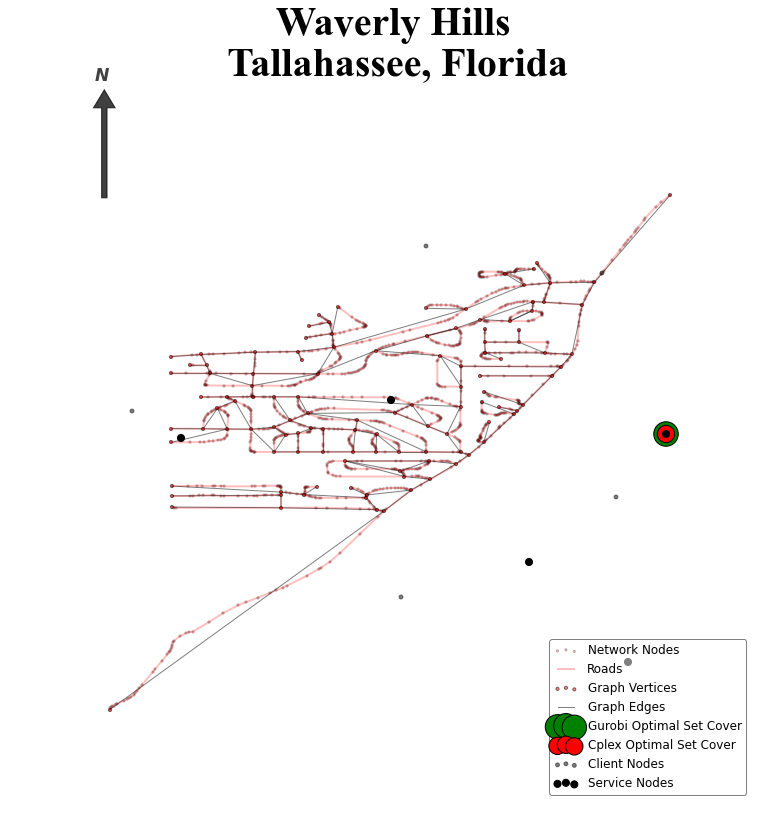

In [38]:
figsize(10,10)
# Draw Network Actual Roads and Nodes
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)
# Draw Graph
nx.draw(g1, ntw.node_coords, node_size=10, alpha=0.5)

# Gurobi Set Cover
SetCover_GUROBI = ps.open('shapefiles/Selected_Locations_SCLP_GUROBI.shp')
points_SetCover_GUROBI = {}
for idx, coords in enumerate(SetCover_GUROBI):
    GUROBI_setcover_g.add_node(idx)
    points_SetCover_GUROBI[idx] = coords
    GUROBI_setcover_g.node[idx] = coords
nx.draw(GUROBI_setcover_g, points_SetCover_GUROBI, 
        node_size=600, alpha=1, node_color='g')

# Cplex Set Cover
SetCover_CPLEX = ps.open('shapefiles/Selected_Locations_SCLP_CPLEX.shp')
points_SetCover_CPLEX = {}
for idx, coords in enumerate(SetCover_CPLEX):
    CPLEX_setcover_g.add_node(idx)
    points_SetCover_CPLEX[idx] = coords
    CPLEX_setcover_g.node[idx] = coords
nx.draw(CPLEX_setcover_g, points_SetCover_CPLEX, 
        node_size=300, alpha=1, node_color='r')

# Draw Graph of Random Service
nx.draw(GRAPH_client, points_client, 
        node_size=15, alpha=.5, node_color='k')

# Draw Graph of Random Service
nx.draw(GRAPH_service, points_service, 
        node_size=50, alpha=1, node_color='k')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
LEGEND['Graph Vertices']=g1
LEGEND['Graph Edges']=g1
LEGEND['Gurobi Optimal Set Cover']=GUROBI_setcover_g
LEGEND['Cplex Optimal Set Cover']=CPLEX_setcover_g
LEGEND['Client Nodes']=GRAPH_client
LEGEND['Service Nodes']=GRAPH_service
legend(LEGEND, loc='lower right', fancybox=True, framealpha=0.5)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')
# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(-84.281, 30.507, 0.0, 0.01, width=.0003, head_width=0.0012, 
          head_length=0.002, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(-84.2815, 30.52), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

<font size='5' face='Times New Roman'><b>3.2 <u>Optimized Values</u></b></font>

In [44]:
print '********************************************************'
print ' | Total Facilities to be opened       '
print ' |  | Gurobi ------------------ ', mSCLP_GUROBI.objVal, '       '
print ' |  | CPLEX ------------------- ', solution.get_objective_value(), '       '
print '-------------------------------------------------------'

if NEW_Records_SCLP_GUROBI == NEW_Records_SCLP_CPLEX:
    print ' | Gurobi and CPLEX chose the same facilities
else:
    print ' | Gurobi and CPLEX chose different facilities



print ' | Facilities to be opened:       '
print ' |  | Gurobi ------------------ ', val, '       '
print ' |  | CPLEX ------------------- ', solution.get_objective_value(), '       '
print '-------------------------------------------------------'
print ' | Total Time to Build Model and Optimize: (seconds)  '
print ' |  | Gurobi ------------------ ', t2G, '       '
print ' |  | CPLEX ------------------- ', t2C, '       '
print '********************************************************'

********************************************************
 | Total Facilities to be opened       
 |  | Gurobi ------------------  1.0        
 |  | CPLEX -------------------  1.0        
-------------------------------------------------------
 | Facilities to be opened:       
 |  | Gurobi ------------------ 

NameError: name 'val' is not defined

In [45]:
NEW_Records_SCLP_GUROBI

[['y3', 'x3', '-84.2497909964', '30.4807717408']]

<font size='5' face='Times New Roman'><b>3.3 <u>System Information</u></b></font>

In [21]:
print '********************************************************'
print ' | Platform Specs:                                    |'
print ' |  | OS X Yosemite v10.10.4                          |'
print ' |  | MacBook Pro (Retina, 13-inch, Early 2015)       |'
print ' |  | Processor: 3.1 GHz Intel Core i7                |'
print ' |  | Memory: 16 GB 1867 MHz DDR3                     |'
print '********************************************************'
print ' |  | Date/Time --------- ', dt.datetime.now(), '|'
print '********************************************************'

********************************************************
 | Platform Specs:                                    |
 |  | OS X Yosemite v10.10.4                          |
 |  | MacBook Pro (Retina, 13-inch, Early 2015)       |
 |  | Processor: 3.1 GHz Intel Core i7                |
 |  | Memory: 16 GB 1867 MHz DDR3                     |
********************************************************
 |  | Date/Time ---------  2015-08-17 16:01:39.005535 |
********************************************************


-----------------------